## Data preparation

In [1]:
categories = ['negative', 'positive']

In [2]:
data = []
target_names = []

with open("./sentiment labelled sentences/amazon_cells_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))

with open("./sentiment labelled sentences/imdb_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))
        
with open("./sentiment labelled sentences/yelp_labelled.txt", encoding="utf-8") as f:
    for line in f:
        (text, answer) = line.split('\t')
        data.append(text)
        target_names.append(int(answer[:-1]))

In [3]:
import pandas as pd
X = pd.DataFrame(data, columns=['text'])
X['category'] = target_names

temp_list = []
for i in target_names:
    temp_list.append(categories[target_names[i]])
X['category_name'] = temp_list
X

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative


## Drop duplicate

In [4]:
X.drop_duplicates(inplace=True)
X.reset_index(drop=True, inplace=True)
X

,text,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2978,I think food should have flavor and texture an...,0,negative
2979,Appetite instantly gone.,0,negative
2980,Overall I was not impressed and would not go b...,0,negative
2981,"The whole experience was underwhelming, and I ...",0,negative


## _Generate meaningful new data visualizations_

<AxesSubplot:title={'center':'total distribution'}>

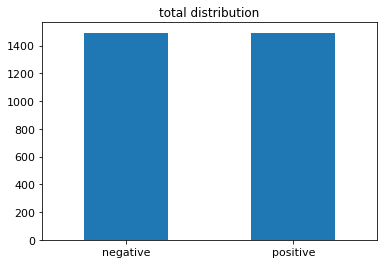

In [5]:
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'total distribution',        
                                    rot = 0, fontsize = 11)

For all data, we have half positive and hlaf negative

In [6]:
X_sample1 = X.sample(n = 1000)
X_sample2 = X.sample(n = 1000)
X_sample3 = X.sample(n = 1000)

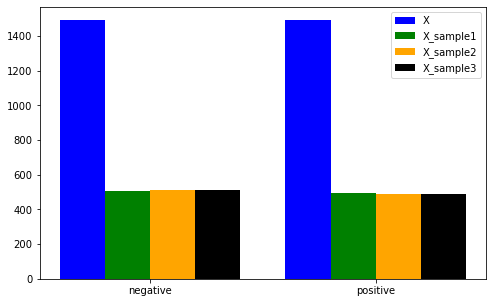

In [7]:
import numpy as np
import matplotlib.pyplot as plt

width = 0.2
X_axis = np.arange(2)
plt.figure(figsize=(8, 5))

# 切割完的X軸-寬度，就會是左bar該站的位置(X_axis - width)
plt.bar(X_axis - 2 * width, X.category_name.value_counts(), width, color = 'blue', label = 'X')
plt.bar(X_axis - width, X_sample1.category_name.value_counts(), width, color = 'green', label = 'X_sample1')
plt.bar(X_axis, X_sample2.category_name.value_counts(), width, color = 'orange', label = 'X_sample2')
plt.bar(X_axis + width, X_sample3.category_name.value_counts(), width, color = 'black', label = 'X_sample3')

# 設定X軸的項目及其位置
plt.xticks(X_axis-width/2, categories)
plt.legend() # 設定圖表右上角那個
plt.show()

Even with sampling, it is still has around equaled size for both categories

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [9]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# when we are sorting frequencies, indexs need to be swapped too
index = np.argsort(term_frequencies)[::-1]  # [::-1]: reverse
term_frequencies = np.sort(term_frequencies)[::-1]

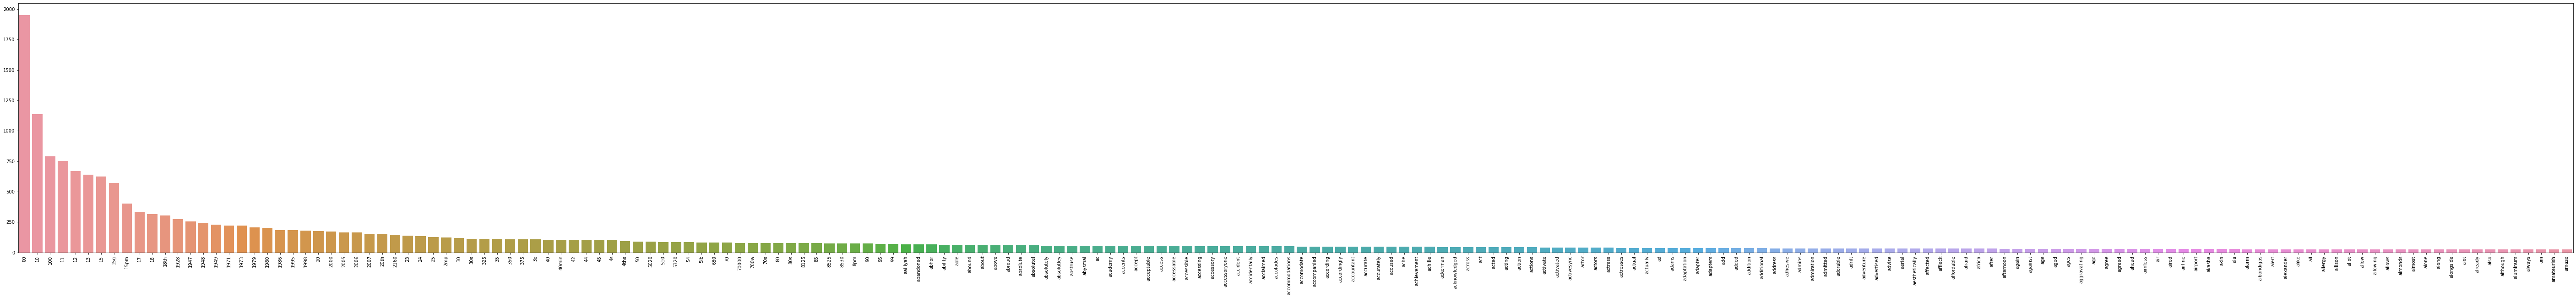

In [10]:
import seaborn as sns

temp = []
for i in index[:200]:
    temp.append(count_vect.get_feature_names()[i])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=temp, 
            y=term_frequencies[:200])
g.set_xticklabels(count_vect.get_feature_names()[:200], rotation = 90);

In [11]:
temp[0], temp[1], temp[2], temp[3], temp[4]

('the', 'and', 'it', 'is', 'to')

我們可以分析出這種在英文會話本身就很常出現的無異議詞，在這個資料集也是很常出現

## _Generate term frequencies feature_

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect1 = CountVectorizer()
X_counts1 = count_vect1.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts1[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [13]:
X_counts1.shape

(2983, 5155)

In [14]:
temp = np.asarray(X_counts1.todense())
temp_sum = np.sum(temp, axis=1)
temp = temp / temp_sum[:, None]

temp = temp.tolist()
X['term_frequency'] = temp
X

,text,category,category_name,term_frequency
0,So there is no way for me to plug it in here i...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Good case, Excellent value.",1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Great for the jawbone.,1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Tied to charger for conversations lasting more...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,The mic is great.,1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2979,Appetite instantly gone.,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2980,Overall I was not impressed and would not go b...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [15]:
count_vect1.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

## _Generate TF-IDF features_

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect2 = TfidfVectorizer()
X_counts2 = count_vect2.fit_transform(X['text'])
print(X_counts2[0])

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [17]:
X_counts2.shape

(2983, 5155)

In [18]:
temp = np.asarray(X_counts2.todense())
temp = temp.tolist()
X['TF-IDF'] = temp
X

,text,category,category_name,term_frequency,TF-IDF
0,So there is no way for me to plug it in here i...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Good case, Excellent value.",1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Great for the jawbone.,1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Tied to charger for conversations lasting more...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,The mic is great.,1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2979,Appetite instantly gone.,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2980,Overall I was not impressed and would not go b...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
count_vect2.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

## _Implement a simple Naive Bayes classifier_

In [20]:
X

,text,category,category_name,term_frequency,TF-IDF
0,So there is no way for me to plug it in here i...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"Good case, Excellent value.",1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Great for the jawbone.,1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Tied to charger for conversations lasting more...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,The mic is great.,1,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2979,Appetite instantly gone.,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2980,Overall I was not impressed and would not go b...,0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2981,"The whole experience was underwhelming, and I ...",0,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

### On term frequency

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(list(X['term_frequency']), list(X['category']), test_size = 0.3)
print("lenth of training:", len(X_train))
print("lenth of testing:", len(X_test))

clf1 = MultinomialNB()
clf1.fit(X_train, Y_train)
Y_result = clf1.predict(X_test)
print(accuracy_score(Y_test, Y_result))
print("mislabeled number: {} out of {}".format((Y_test != Y_result).sum(), len(Y_test)))

lenth of training: 2088
lenth of testing: 895
0.7687150837988826
mislabeled number: 207 out of 895


### On TF-IDF

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(list(X['TF-IDF']), list(X['category']), test_size = 0.3)
print("lenth of training:", len(X_train))
print("lenth of testing:", len(X_test))

clf2 = MultinomialNB()
clf2.fit(X_train, Y_train)
Y_result = clf2.predict(X_test)
print(accuracy_score(Y_test, Y_result))
print("mislabeled number: {} out of {}".format((Y_test != Y_result).sum(), len(Y_test)))

lenth of training: 2088
lenth of testing: 895
0.7966480446927374
mislabeled number: 182 out of 895


Let's watch closely into term frequency and TFIDF

term frequency
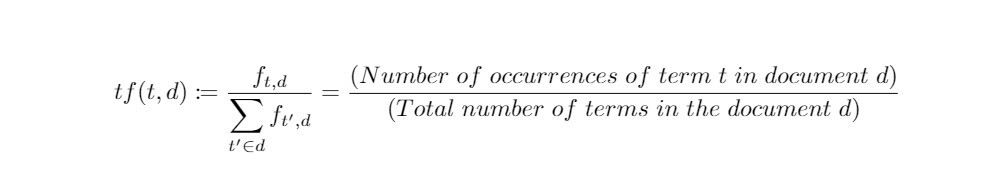

IDF
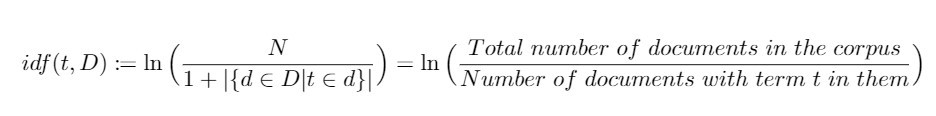

In term frequency, we just care about the occurence of a word in a document, whcih means if there are many non-meaning words, such like "a", "an", "the", their TF will be high enough. Then, classifier might not classified well because in positive or negative sentences, both of them might contain many non-meaning words.

So there is IDF to solve this problem, IDF can distinguish non-meaning words by the equation above. For example, "the" occurs in almost every doc, so the denominator is large, then the ratio will be small. After computing IDF, we use TF to multiply IDF, then the doc not having lots of non-meaning words will have larger numerical value to compute bayes.